# IMPORTAR LIBRERIAS

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# CARGAMOS EL DATA SET CONSUMO DE COMIDA CON PANDAS

In [ ]:
df_consumo = pd.read_excel('2. Data Set Consumo Comida - ORANGE.xlsx')
df_consumo

,Gasto de Comida,Ingresos x 1000,Tamaño de Familia,Hijos
0,3900,37.6,4,0
1,5300,51.5,5,1
2,4300,51.6,4,0
3,4900,46.8,5,0
4,6400,53.8,6,1
5,7300,62.6,7,1
6,4900,54.3,5,0
7,5300,43.7,4,0
8,6100,60.8,5,1
9,6400,51.3,6,1


# EXPLORACIÓN DE LOS DATOS

### COLUMNAS

Mostramos todas las columnas del dataset

In [ ]:
df_consumo.columns

Index(['Gasto de Comida', 'Ingresos x 1000', 'Tamaño de Familia', 'Hijos'], dtype='object')

### TIPO DE DATOS DE LAS COLUMNAS

In [ ]:
df_consumo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gasto de Comida    12 non-null     int64  
 1   Ingresos x 1000    12 non-null     float64
 2   Tamaño de Familia  12 non-null     int64  
 3   Hijos              12 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 512.0 bytes


### DATOS *ESTADÍSTICOS*

In [ ]:
df_consumo.describe()

,Gasto de Comida,Ingresos x 1000,Tamaño de Familia,Hijos
count,12.000000,12.000000,12.000000,12.000000
mean,5666.666667,51.633333,5.166667,0.500000
std,1103.163495,6.919581,0.937437,0.522233
min,3900.000000,37.600000,4.000000,0.000000
25%,4900.000000,48.675000,4.750000,0.000000
50%,5550.000000,51.550000,5.000000,0.500000
75%,6400.000000,54.800000,6.000000,1.000000
max,7400.000000,62.600000,7.000000,1.000000


### CORRELACION ENTRE LOS DATOS

CORRELACIÓN ENTRE TODOS LOS DATOS DE CADA COLUMNA DEL DATASET , AQUÍ SE MUESTRA UNA MATRIZ DE CORRELACIÓN

In [ ]:
df_consumo_corr = df_consumo.corr()
df_consumo_corr

,Gasto de Comida,Ingresos x 1000,Tamaño de Familia,Hijos
Gasto de Comida,1.000000,0.586694,0.876144,0.773213
Ingresos x 1000,0.586694,1.000000,0.608707,0.490566
Tamaño de Familia,0.876144,0.608707,1.000000,0.742781
Hijos,0.773213,0.490566,0.742781,1.000000


## VER DE MANERA ESPECIFICA LA CORRELACION DE LA VARIABLE DEPENDIENTE "GASTO DE COMIDA" CON LAS OTRAS VARIABLES INDEPENDIENTES Y EN SI MISMA

In [ ]:
df_consumo_corr['Gasto de Comida'].sort_values(ascending = False) # Lo ordenamos de mayor a menor

Gasto de Comida      1.000000
Tamaño de Familia    0.876144
Hijos                0.773213
Ingresos x 1000      0.586694
Name: Gasto de Comida, dtype: float64

### VER DE MANERA GRÁFICA LA CORRELACIÓN ENTRE LA VARIABLE DEPENDIENTE Y LAS VARIABLES INDEPENDIENTES

GASTO DE COMIDA Y TAMAÑO DE FAMILIA , SEGÚN LA MATRIZ LA CORRELACÓN ES DE 0.876144

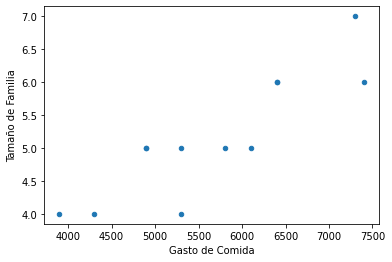

In [ ]:
df_consumo.plot(kind = 'scatter' , x = 'Gasto de Comida' , y = 'Tamaño de Familia')
plt.show()

GASTO DE COMIDA E INGRESOS X 1000 , SEGÚN LA MATRIZ LA CORRELACÓN ES DE 0.773213

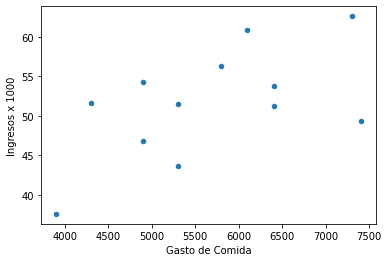

In [ ]:
df_consumo.plot(kind = 'scatter' , x = 'Gasto de Comida' , y = 'Ingresos x 1000')
plt.show()

GASTO DE COMIDA E HIJOS , SEGÚN LA MATRIZ LA CORRELACÓN ES DE 0.586694

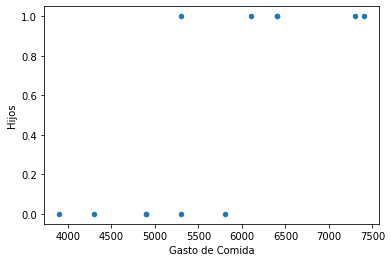

In [ ]:
df_consumo.plot(kind = 'scatter' , x = 'Gasto de Comida' , y = 'Hijos')
plt.show()

# APLICANDO REGRESIÓN LINEAL

In [ ]:
#Importamos las librerias
from sklearn import linear_model
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error

CREAMOS UN MODELO DE REGRESION LINEAL LLAMADO "regresion_model"

In [ ]:
regresion_model = linear_model.LinearRegression()

In [ ]:
val_inde = ['Ingresos x 1000', 'Tamaño de Familia', 'Hijos'] #Variables independientes
val_dep = 'Gasto de Comida' #Variable independiente

SEPARAMOS LAS VARIABLES INDEPENDIENTES EN X y la DEPENDIENTE EN Y

In [ ]:
x = df_consumo[val_inde] #INDEPENDIENTE
y = df_consumo[val_dep] #DEPENDIENTE

In [ ]:
x #Una vista de nuestras columnas de variables independientes

,Ingresos x 1000,Tamaño de Familia,Hijos
0,37.6,4,0
1,51.5,5,1
2,51.6,4,0
3,46.8,5,0
4,53.8,6,1
5,62.6,7,1
6,54.3,5,0
7,43.7,4,0
8,60.8,5,1
9,51.3,6,1


In [ ]:
y #Una vista de nuestras columna de variable dependiente

0     3900
1     5300
2     4300
3     4900
4     6400
5     7300
6     4900
7     5300
8     6100
9     6400
10    7400
11    5800
Name: Gasto de Comida, dtype: int64

ENTRENAMOS LOS DATOS AL MODELO DE REGRESIÓN

In [ ]:
regresion_model.fit(x,y) #fit("variable independiente" , "variable dependiente")

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Una vez entrenado el modelo con los datos , podemos sacar algunos datos interesantes de estos:

In [ ]:
regresion_model.coef_  #sacar el coeficiente de regresión lineal de cada variable dependiente
#'Ingresos x 1000', 'Tamaño de Familia', 'Hijos'

array([ 10.91800495, 748.38371854, 564.52134309])

MOSTRAR LA ECUACIÓN DE LA RECTA

In [ ]:
#Creamos variables para poner un coeficiente en cada variable
m1 = regresion_model.coef_[0]
m2 = regresion_model.coef_[1]
m3 = regresion_model.coef_[2]

In [ ]:
b = regresion_model.intercept_ #intercepto de la regresión lineal
b

954.0237936782441

In [ ]:
word = f'y = {b}  + {m1} * x1 + {m2} * x2 + {m3} * x3'
print('La ecuación de la recta es:')
word

La ecuación de la recta es:


'y = 954.0237936782441  + 10.918004950925999 * x1 + 748.3837185435822 * x2 + 564.5213430942047 * x3'

Ahora haremos predicciones con la regresión lineal

### Prediciendo con la regresión lineal...

In [ ]:
gasto_comida_estimado = regresion_model.predict(x) #Predeciremos con las variables que hemos puesto en x
gasto_comida_estimado #Nos da valores predecidos en un array

array([4358.07565401, 5822.74098446, 4510.92772332, 5206.9050181 ,
       6596.23611439, 7440.69827651, 5288.79005523, 4424.67548421,
       5924.27843051, 6568.94110202, 6547.10509211, 5310.62606513])

### Creamos una nueva columna en el dataframe con los valores predecidos , llamado gasto_comida_estimado

In [ ]:
#Esos valores predecidos lo insertamos a nuestro dataset df_consumo como una columna nueva
df_consumo['gasto_comida_estimado'] = gasto_comida_estimado
df_consumo

,Gasto de Comida,Ingresos x 1000,Tamaño de Familia,Hijos,gasto_comida_estimado
0,3900,37.6,4,0,4358.075654
1,5300,51.5,5,1,5822.740984
2,4300,51.6,4,0,4510.927723
3,4900,46.8,5,0,5206.905018
4,6400,53.8,6,1,6596.236114
5,7300,62.6,7,1,7440.698277
6,4900,54.3,5,0,5288.790055
7,5300,43.7,4,0,4424.675484
8,6100,60.8,5,1,5924.278431
9,6400,51.3,6,1,6568.941102


Con los valores predecidos podemos sacar los errores y su R-square

### R SQUARE

In [ ]:
R_square = r2_score(y , gasto_comida_estimado) #Para medir el nivel de eficiencia del modelo 
#r2_score("valor real" , "valor predecido")
R_square

0.8040017151303603

### ERRORES TÍPICOS

In [ ]:
#MAE
mae = mean_absolute_error(y , gasto_comida_estimado)
mae

398.8858213395699

In [ ]:
#MSE
mse = mean_squared_error(y , gasto_comida_estimado)
mse

218646.97556568694

In [ ]:
#RMSE
rmse = mse ** 0.5
rmse

467.5970226227782

Por último , no hay que olvidarnos del P VALUE

# P VALUE

In [ ]:
import statsmodels.api as sm
from scipy import stats
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
print(est.fit().f_pvalue) #P VALUE MODEL

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


0.0033342528546476983


In [ ]:
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:        Gasto de Comida   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     10.94
Date:                Tue, 08 Jun 2021   Prob (F-statistic):            0.00333
Time:                        17:44:49   Log-Likelihood:                -90.799
No. Observations:                  12   AIC:                             189.6
Df Residuals:                       8   BIC:                             191.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               954.0238   1580.83

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


P > | t | : P VALUE

De aquí podemos ver :

Ingresos x 1000 tiene un p value 0.738 , no tiene significancia en el modelo

Tamaño de Familia un p value 0.039 ,  tiene significancia en el modelo

Hijos un p value 0.287 , no tiene significancia en el modelo